# Assignment3

In [2]:
import numpy as np
from scipy.signal import convolve2d, fftconvolve
from datetime import datetime
import random

## Experiment1

In [12]:
import numpy as np
from scipy.signal import convolve2d, fftconvolve
from datetime import datetime
import random

# create random data
# ouput will be sotred  in a pre-allocated array O, dimension A
def makeData (N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(N, N, numimg)
    F = np.random.rand(M, M, numfilt)
    O = np.zeros((N, N, numimg, numfilt))
    return I, F, O

# convolve each image with each filter
def c2d (I, F, O):
    for i in range(I.shape[2]):
        for j in range(F.shape[2]):
            O[:,:,i,j] = convolve2d(I[:,:,i], F[:,:,j], mode='same')
    return O

# convolve each image with each filter
def c2dfft (I, F, O):
    for i in range(I.shape[2]):
        for j in range(F.shape[2]):
            O[:,:,i,j] = fftconvolve(I[:,:,i], F[:,:,j], mode='same')
    return O

# compare the two methods
def compare (I, F, O):
    O1 = np.zeros(O.shape)
    O2 = np.zeros(O.shape)
    t1 = datetime.now()
    O1 = c2d(I, F, O1)
    t2 = datetime.now()
    O2 = c2dfft(I, F, O2)
    t3 = datetime.now()
    print('conv2d time: ', t2-t1)
    print('fft2d time: ', t3-t2)
    print('max error: ', np.max(np.abs(O1-O2)))

# run the code
I, F, O = makeData()
print("Test for code - img_size : {}, number of filters : {}".format(I.shape[0], F.shape[-1]))
compare(I, F, O)

Test for code - img_size : 256, number of filters : 3
conv2d time:  0:00:00.110912
fft2d time:  0:00:00.034072
max error:  2.1316282072803006e-14


### Without plot, comparing the cases with changing the number of filters from 2 to 10

In [ ]:
# experiment the time execution of the two methods repeating the experiment 20 times

img_size = [512]
filter_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]
def experiment(img_size, filter_size, num_iter=20):

    random.seed(119)
    random_seed = random.sample(range(200), num_iter)

    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            for k in range(num_iter):
                I, F, O = makeData(img_size[i], 2, filter_size[j], 3, random_seed[k])
                compare(I, F, O)

experiment(img_size, filter_size)

conv2d time:  0:00:00.075835
fft2d time:  0:00:00.183950
max error:  2.220446049250313e-15
conv2d time:  0:00:00.070881
fft2d time:  0:00:00.131647
max error:  2.220446049250313e-15
conv2d time:  0:00:00.052352
fft2d time:  0:00:00.122736
max error:  1.9984014443252818e-15
conv2d time:  0:00:00.058932
fft2d time:  0:00:00.126960
max error:  1.9984014443252818e-15
conv2d time:  0:00:00.054274
fft2d time:  0:00:00.123693
max error:  1.7763568394002505e-15
conv2d time:  0:00:00.059449
fft2d time:  0:00:00.128334
max error:  2.220446049250313e-15
conv2d time:  0:00:00.050659
fft2d time:  0:00:00.156147
max error:  1.9984014443252818e-15
conv2d time:  0:00:00.070143
fft2d time:  0:00:00.146062
max error:  1.7763568394002505e-15
conv2d time:  0:00:00.052954
fft2d time:  0:00:00.128325
max error:  1.9984014443252818e-15
conv2d time:  0:00:00.057891
fft2d time:  0:00:00.121719
max error:  1.9984014443252818e-15
conv2d time:  0:00:00.052674
fft2d time:  0:00:00.119928
max error:  1.776356839400

### With plots, we compare cases with changing image size and the number of filters

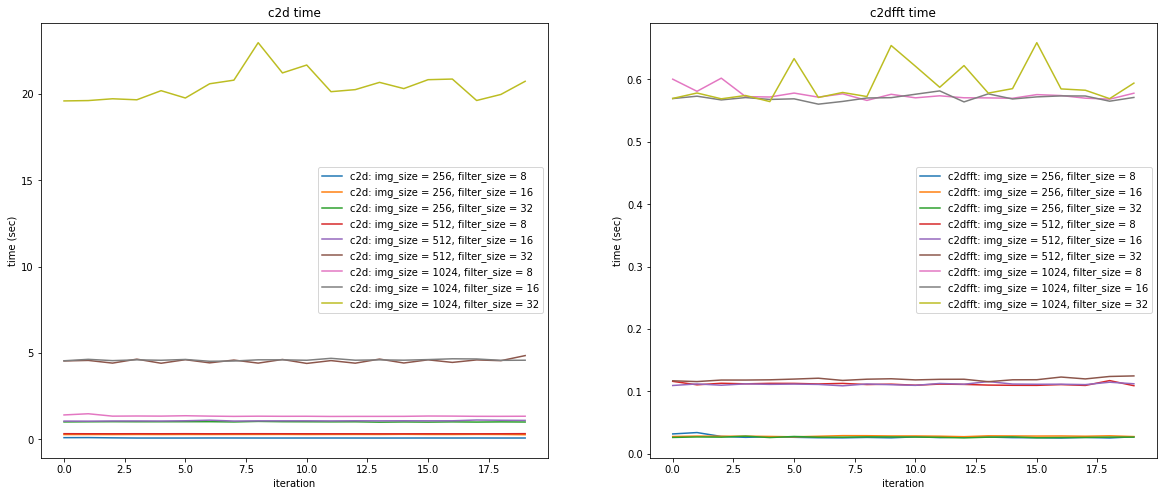

In [ ]:
# plot the results
import matplotlib.pyplot as plt

def plot_results(img_size, filter_size, num_iter=20):

    random.seed(119)
    random_seed = random.sample(range(200), num_iter)

    c2d_time = np.zeros((len(img_size), len(filter_size), num_iter))
    c2dfft_time = np.zeros((len(img_size), len(filter_size), num_iter))

    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            for k in range(num_iter):
                # Making data
                I, F, O = makeData(img_size[i], 2, filter_size[j], 3, random_seed[k])
                # Initialize output format
                O1 = np.zeros(O.shape)
                O2 = np.zeros(O.shape)
                # time for start case 1
                t1 = datetime.now()
                O1 = c2d(I, F, O1)
                # time for both end case 1 and start case 2
                t2 = datetime.now()
                O2 = c2dfft(I, F, O2)
                # time for end case 2
                t3 = datetime.now()
                c2d_time[i, j, k] = (t2-t1).total_seconds()
                c2dfft_time[i, j, k] = (t3-t2).total_seconds()

    # Visualizatin 
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            ax[0].plot(c2d_time[i, j, :], label='c2d: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
            ax[1].plot(c2dfft_time[i, j, :], label='c2dfft: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))

    ax[0].set_title('c2d time')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylabel('time (sec)')
    ax[0].legend()
    ax[1].set_title('c2dfft time')
    ax[1].set_xlabel('iteration')
    ax[1].set_ylabel('time (sec)')
    ax[1].legend()

    plt.show()

img_size = [256, 512, 1024]
filt_size = [8, 16, 32]
plot_results(img_size, filt_size)

Fourier transformation becomes faster when the filter size is larger than 4. Until then, convolution is slightly faster.<br>
If the filter becomes larger and larger then the time for convolution grows exponentially.

----------------------------------------------------

Then, we fix the image size to 256 and compare the cases with changing filter size

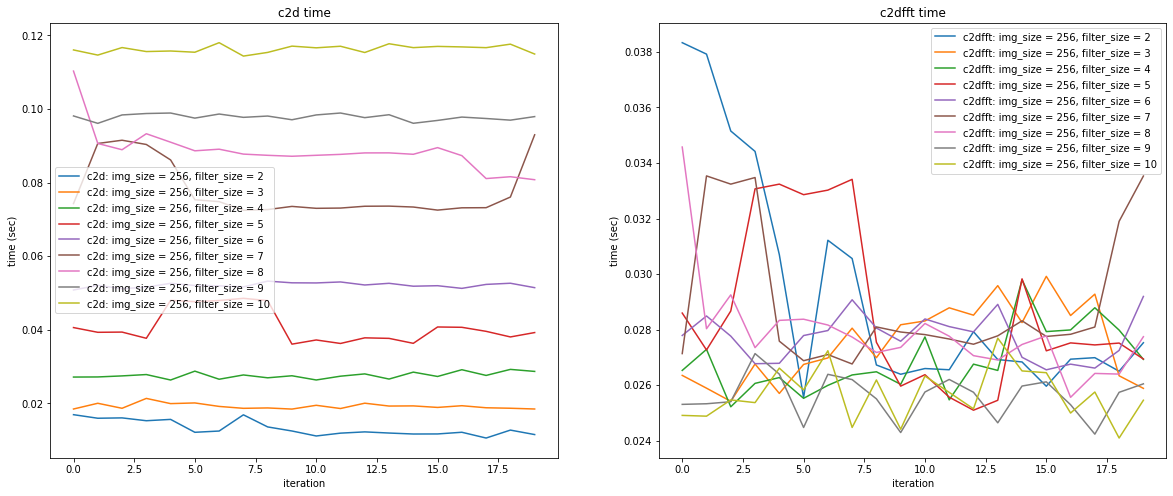

In [ ]:
img_size = [256]
filt_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]
plot_results(img_size, filt_size)

Typically speaking, Fourier trasformation is much fater than convolution except for filter size 2

In the case of convolution, the filter size and the time required are proportional. However, when filter size is 7,8, and 9, it can be reversed.

In the case of fourier transformation, the time gap is very small.

Furthermore, we should consider filter size when we use convolution for time required. On the other hand, Fourier transformation is less matter which filter size is used.

## Experiment2

In [8]:
# This is for (N, N, numimg) form
def makeData1 (N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(N, N, numimg)
    F = np.random.rand(M, M, numfilt)
    O = np.zeros((N, N, numimg, numfilt))

    return I, F, O

def c2d1(I, F, O):
    img_len = I.shape[2]
    filter_len = F.shape[2]
    for im in range(img_len):
        for fi in range(filter_len):
            O[:, :, im, fi] = convolve2d(I[:,:,im], F[:,:,fi], mode='same', boundary='fill', fillvalue=0)


def c2dfft1(I, F, O):
    img_len = I.shape[2]
    filter_len = F.shape[2]
    for im in range(img_len):
        for fi in range(filter_len):
            O[:, :, im, fi] = fftconvolve(I[:,:,im], F[:,:,fi], mode='same')


# This is for ( numimg, N, N) form

def makeData2 (N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(numimg, N, N)
    F = np.random.rand(numfilt, M, M)
    O = np.zeros((N, N, numimg, numfilt))

    return I, F, O
def c2d2(I, F, O):
    for im, img in enumerate(I):
        for fi, fil in enumerate(F):
            O[:, :, im, fi] = convolve2d(img, fil, mode='same', boundary='fill', fillvalue=0)

def c2dfft2(I, F, O):
    for im, img in enumerate(I):
        for fi, fil in enumerate(F):
            O[:, :, im, fi] = fftconvolve(img, fil, mode='same')

In [9]:
def experiment(img_size, filter_size):
    random.seed(119)
    random_seed = random.sample(range(200), k=20)
    
    args1 = {}
    args2 = {}
    
    for f in filter_size:
        temp1 = []
        temp2 = []    
        for seed in random_seed:
            I1, F1, O1 = makeData1(img_size, 2, f, 3, seed)
            temp1.append((I1, F1, O1))
            I2, F2, O2 = makeData2(img_size, 2, f, 3, seed)
        args1[f] = temp1
        args2[f] = temp2

    for f in filter_size:
        results = []
        start1 = datetime.now()
        for arg in args1[f]:
            I_temp, F_temp, O_temp = arg
            c2d1(I_temp, F_temp, O_temp)
        end1 = datetime.now()
        results.append((end1 - start1))

        start2 = datetime.now()
        for arg in args1[f]:
            I_temp, F_temp, O_temp = arg
            c2dfft1(I_temp, F_temp, O_temp)
        end2 = datetime.now()
        results.append((end2 - start2))

        start3 = datetime.now()
        for arg in args2[f]:
            I_temp, F_temp, O_temp = arg
            c2d2(I_temp, F_temp, O_temp)
        end3 = datetime.now()
        results.append((end3 - start3))

        start4 = datetime.now()
        for arg in args2[f]:
            I_temp, F_temp, O_temp = arg
            c2dfft2(I_temp, F_temp, O_temp)
        end4 = datetime.now()
        results.append((end4 - start4))

        print("Filter size: {}, convolution(N, N, img): {}, fourier(M, M, filt): {},  ||  convolution(img, N, N): {}, fourier(filt, M, M): {} ".format(f, results[0], results[1], results[2], results[3]))

In [6]:
img_size = 512
filter_size = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
experiment(img_size, filter_size)

Filter size: 2, convolution(N, N, img): 0:00:00.361121, fourier(M, M, filt): 0:00:00.713493,  ||  convolution(img, N, N): 0:00:00.000001, fourier(filt, M, M): 0:00:00 
Filter size: 3, convolution(N, N, img): 0:00:00.585609, fourier(M, M, filt): 0:00:00.703237,  ||  convolution(img, N, N): 0:00:00.000001, fourier(filt, M, M): 0:00:00 
Filter size: 4, convolution(N, N, img): 0:00:00.895930, fourier(M, M, filt): 0:00:00.709604,  ||  convolution(img, N, N): 0:00:00.000001, fourier(filt, M, M): 0:00:00.000001 
Filter size: 5, convolution(N, N, img): 0:00:01.247817, fourier(M, M, filt): 0:00:00.713040,  ||  convolution(img, N, N): 0:00:00.000001, fourier(filt, M, M): 0:00:00 
Filter size: 6, convolution(N, N, img): 0:00:01.700253, fourier(M, M, filt): 0:00:00.700250,  ||  convolution(img, N, N): 0:00:00.000001, fourier(filt, M, M): 0:00:00 
Filter size: 7, convolution(N, N, img): 0:00:02.301327, fourier(M, M, filt): 0:00:00.699612,  ||  convolution(img, N, N): 0:00:00.000002, fourier(filt, M

## Plot the results

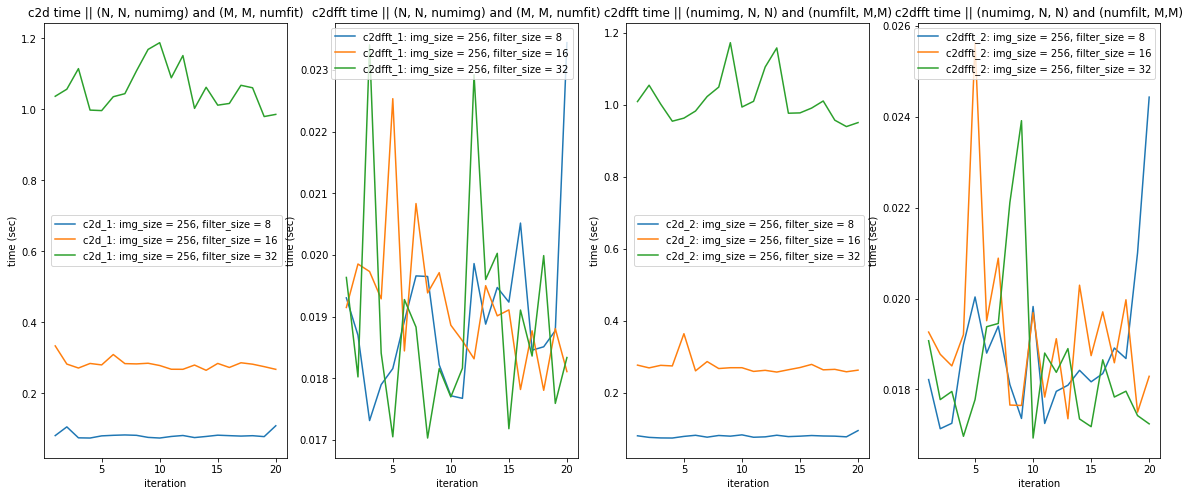

In [19]:
# plot the results
import matplotlib.pyplot as plt

def plot_results(img_size, filter_size, num_iter=20):

    random.seed(119)
    random_seed = random.sample(range(200), num_iter)

    c2d_time_1 = np.zeros((len(img_size), len(filter_size), num_iter))
    c2dfft_time_1 = np.zeros((len(img_size), len(filter_size), num_iter))

    c2d_time_2 = np.zeros((len(img_size), len(filter_size), num_iter))
    c2dfft_time_2 = np.zeros((len(img_size), len(filter_size), num_iter))

    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            for k in range(num_iter):
                # Making data
                I1, F1, O1 = makeData1(img_size[i], 2, filter_size[j], 3, random_seed[k])
                I2, F2, O2 = makeData2(img_size[i], 2, filter_size[j], 3, random_seed[k])
                # Initialize output format

                # convolution (N, N, numimg) and (M, M, numfit)
                O1_c = np.zeros(O1.shape)
                # Fourier transform  (N, N, numimg) and (M, M, numfit)
                O1_f = np.zeros(O1.shape)

                # convolution (numimg, N, N) and (numfilt, M,M)
                O2_c = np.zeros(O2.shape)
                # Fourier transform  (numimg, N, N) and (numfilt, M,M)
                O2_f = np.zeros(O2.shape)


                # (N, N, numimg) and (M, M, numfit)
                t1 = datetime.now()
                O1_c = c2d1(I1, F1, O1_c)
                # time for both end case 1 and start case 2
                t2 = datetime.now()
                O1_f = c2dfft1(I1, F1, O1_f)
                
                # time for end case 2
                t3 = datetime.now()
                c2d_time_1[i, j, k] = (t2-t1).total_seconds()
                c2dfft_time_1[i, j, k] = (t3-t2).total_seconds()


                # (numimg, N, N) and (numfilt, M,M)

                t1 = datetime.now()
                O2_c = c2d2(I2, F2, O2_c)
                # time for both end case 1 and start case 2
                t2 = datetime.now()
                O2_f = c2dfft2(I2, F2, O2_f)
                
                # time for end case 2
                t3 = datetime.now()
                c2d_time_2[i, j, k] = (t2-t1).total_seconds()
                c2dfft_time_2[i, j, k] = (t3-t2).total_seconds()


    # Visualizatin 
    fig, ax = plt.subplots(1, 4, figsize=(20, 8))
    # fig, ax = plt.errorbar(1, 4, figsize=(20, 8))
    x = list(range(1,21))
    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            ax[0].plot(x, c2d_time_1[i, j, :], label='c2d_1: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
            # ax[0].plot(c2d_time_1[i, j, :], label='c2d_1: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
            ax[1].plot(x,c2dfft_time_1[i, j, :], label='c2dfft_1: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
            ax[2].plot(x,c2d_time_2[i, j, :], label='c2d_2: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
            ax[3].plot(x,c2dfft_time_2[i, j, :], label='c2dfft_2: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))

    ax[0].set_title('c2d time || (N, N, numimg) and (M, M, numfit)')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylabel('time (sec)')
    ax[0].legend()
    ax[1].set_title('c2dfft time || (N, N, numimg) and (M, M, numfit)')
    ax[1].set_xlabel('iteration')
    ax[1].set_ylabel('time (sec)')
    ax[1].legend()
    ax[2].set_title('c2dfft time || (numimg, N, N) and (numfilt, M,M)')
    ax[2].set_xlabel('iteration')
    ax[2].set_ylabel('time (sec)')
    ax[2].legend()
    ax[3].set_title('c2dfft time || (numimg, N, N) and (numfilt, M,M)')
    ax[3].set_xlabel('iteration')
    ax[3].set_ylabel('time (sec)')
    ax[3].legend()
    plt.show()

img_size = [256]
filt_size = [8, 16, 32]
plot_results(img_size, filt_size)

## Plot - Errorbar

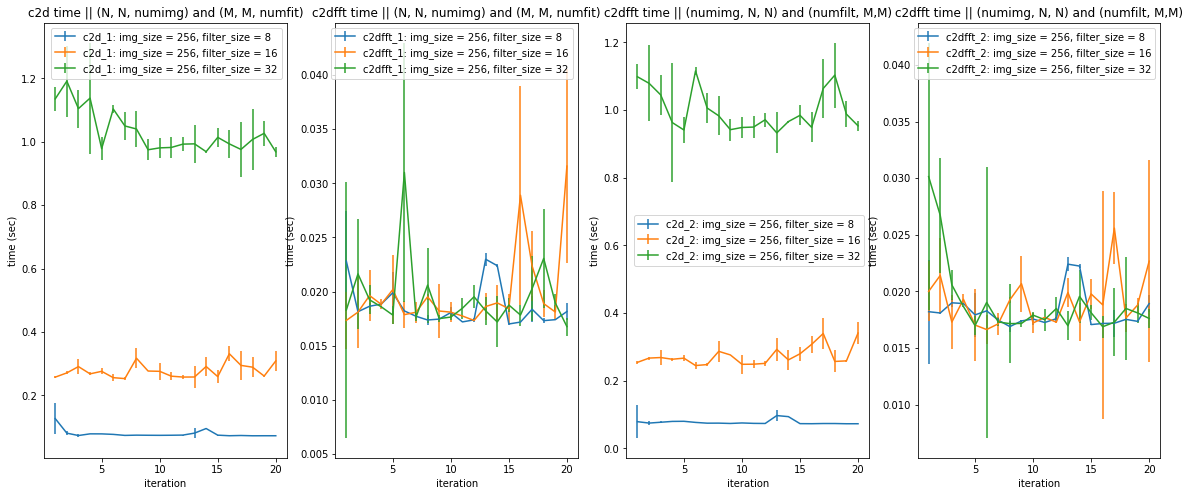

In [36]:
def errorbar_results(img_size, filter_size, num_iter=20):

    random.seed(119)
    random_seed = random.sample(range(200), num_iter)

    c2d_time_1 = np.zeros((len(img_size), len(filter_size), num_iter))
    c2dfft_time_1 = np.zeros((len(img_size), len(filter_size), num_iter))

    c2d_time_2 = np.zeros((len(img_size), len(filter_size), num_iter))
    c2dfft_time_2 = np.zeros((len(img_size), len(filter_size), num_iter))

    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            for k in range(num_iter):
                # Making data
                I1, F1, O1 = makeData1(img_size[i], 2, filter_size[j], 3, random_seed[k])
                I2, F2, O2 = makeData2(img_size[i], 2, filter_size[j], 3, random_seed[k])
                # Initialize output format

                # convolution (N, N, numimg) and (M, M, numfit)
                O1_c = np.zeros(O1.shape)
                # Fourier transform  (N, N, numimg) and (M, M, numfit)
                O1_f = np.zeros(O1.shape)

                # convolution (numimg, N, N) and (numfilt, M,M)
                O2_c = np.zeros(O2.shape)
                # Fourier transform  (numimg, N, N) and (numfilt, M,M)
                O2_f = np.zeros(O2.shape)


                # (N, N, numimg) and (M, M, numfit)
                t1 = datetime.now()
                O1_c = c2d1(I1, F1, O1_c)
                # time for both end case 1 and start case 2
                t2 = datetime.now()
                O1_f = c2dfft1(I1, F1, O1_f)
                
                # time for end case 2
                t3 = datetime.now()
                c2d_time_1[i, j, k] = (t2-t1).total_seconds()
                c2dfft_time_1[i, j, k] = (t3-t2).total_seconds()


                # (numimg, N, N) and (numfilt, M,M)

                t1 = datetime.now()
                O2_c = c2d2(I2, F2, O2_c)
                # time for both end case 1 and start case 2
                t2 = datetime.now()
                O2_f = c2dfft2(I2, F2, O2_f)
                
                # time for end case 2
                t3 = datetime.now()
                c2d_time_2[i, j, k] = (t2-t1).total_seconds()
                c2dfft_time_2[i, j, k] = (t3-t2).total_seconds()


    # Visualizatin 
    fig, ax = plt.subplots(1, 4, figsize=(20, 8))
    # fig, ax = plt.errorbar(1, 4, figsize=(20, 8))
    x = list(range(1,21))
    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            # Calculating gap for errobar
            c2d_gap = [time1 - c2d_time_2[i, j, :][idx] for idx,time1 in enumerate(c2d_time_1[i, j, :])]
            c2dfft_gap = [time2 - c2dfft_time_2[i, j, :][idx] for idx,time2 in enumerate(c2dfft_time_1[i, j, :])]

            ax[0].errorbar(x, c2d_time_1[i, j, :], yerr = c2d_gap, label='c2d_1: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
            ax[1].errorbar(x,c2dfft_time_1[i, j, :], yerr = c2dfft_gap,label='c2dfft_1: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
            ax[2].errorbar(x,c2d_time_2[i, j, :], yerr = c2d_gap, label='c2d_2: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
            ax[3].errorbar(x,c2dfft_time_2[i, j, :], yerr = c2dfft_gap, label='c2dfft_2: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))

    ax[0].set_title('c2d time || (N, N, numimg) and (M, M, numfit)')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylabel('time (sec)')
    ax[0].legend()
    ax[1].set_title('c2dfft time || (N, N, numimg) and (M, M, numfit)')
    ax[1].set_xlabel('iteration')
    ax[1].set_ylabel('time (sec)')
    ax[1].legend()
    ax[2].set_title('c2dfft time || (numimg, N, N) and (numfilt, M,M)')
    ax[2].set_xlabel('iteration')
    ax[2].set_ylabel('time (sec)')
    ax[2].legend()
    ax[3].set_title('c2dfft time || (numimg, N, N) and (numfilt, M,M)')
    ax[3].set_xlabel('iteration')
    ax[3].set_ylabel('time (sec)')
    ax[3].legend()
    plt.show()
img_size = [256]
filt_size = [8, 16, 32]
errorbar_results(img_size, filt_size)

In the case of convolution, (N, N, numimg) shape plot's variation is less than (numimg, N, N), but the difference both of them is small.
In the case of fourier transformation, (numimg, N, N) shape plot's variation is less than (N, N, numimg). It makes relatively difference. 
Integrally, Convolution and fourier transformation with shape of (numimg, N, N) is much faster than the shape of (N, N, numimg)